# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [2]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [3]:
# frequency table for prestige and whether or not someone was admitted
print pd.crosstab(index=df["prestige"],  # Make a crosstab
                              columns="count")      # Name the count column



col_0     count
prestige       
1.0          61
2.0         148
3.0         121
4.0          67


In [4]:
table1 = pd.crosstab(df["prestige"], 
                            columns=df['admit'])
print table1

admit      0   1
prestige        
1.0       28  33
2.0       95  53
3.0       93  28
4.0       55  12


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [5]:
df = df.join(pd.get_dummies(df['prestige'], prefix = 'prestige_'))
df.head()


,admit,gre,gpa,prestige,prestige__1.0,prestige__2.0,prestige__3.0,prestige__4.0
0,0,380.0,3.61,3.0,0.0,0.0,1.0,0.0
1,1,660.0,3.67,3.0,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,1.0,0.0,0.0,0.0
3,1,640.0,3.19,4.0,0.0,0.0,0.0,1.0
4,0,520.0,2.93,4.0,0.0,0.0,0.0,1.0


In [6]:
df.shape

(397, 8)

#### 2.2 When modeling our class variables, how many do we need? 



Answer: seven

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [7]:
cols_to_keep = ['admit', 'gre', 'gpa','prestige__1.0','prestige__2.0','prestige__3.0']
handCalc = df[cols_to_keep]
print handCalc.head()

   admit    gre   gpa  prestige__1.0  prestige__2.0  prestige__3.0
0      0  380.0  3.61            0.0            0.0            1.0
1      1  660.0  3.67            0.0            0.0            1.0
2      1  800.0  4.00            1.0            0.0            0.0
3      1  640.0  3.19            0.0            0.0            0.0
4      0  520.0  2.93            0.0            0.0            0.0


In [8]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted

table2 = pd.crosstab(df["prestige__1.0"], 
                            columns=df['admit'])
print table2

admit            0   1
prestige__1.0         
0.0            243  93
1.0             28  33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [9]:
p = float(33)/(28+33)

print float(p)/(1-p)

1.17857142857


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [10]:
p2 = float(93)/(243+93)
print float(p2)/(1-p2)

0.382716049383


#### 3.3 Calculate the odds ratio

In [11]:
print  p/p2

1.95452141724


#### 3.4 Write this finding in a sentenance: 

Answer: the odd of those who attend ranked 1 college is 1.95 time of the odd of those who do not

#### 3.5 Print the cross tab for prestige_4

In [12]:
table3 = pd.crosstab(df["prestige__4.0"], 
                            columns=df['admit'])
print table3

admit            0    1
prestige__4.0          
0.0            216  114
1.0             55   12


#### 3.6 Calculate the OR 

In [13]:
p1 = (12)/(55.0+12.0)
Odd1 = p1/(1-p1)
P2 = float(114)/(216.0+114.0)
Odd2 = p2/(1-p2)
OR = Odd1/Odd2
print OR, Odd1, Odd2


0.57008797654 0.218181818182 0.382716049383


In [14]:
print (12/55.0)/(114/216.0)

0.413397129187


#### 3.7 Write this finding in a sentence

Answer:the odd of those who attend ranked 4 college is 0.57 times of those who do not.

## Part 4. Analysis

In [15]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa','prestige__2.0','prestige__3.0', 'prestige__4.0']
data = df[cols_to_keep]
print data.head()

   admit    gre   gpa  prestige__2.0  prestige__3.0  prestige__4.0
0      0  380.0  3.61            0.0            1.0            0.0
1      1  660.0  3.67            0.0            1.0            0.0
2      1  800.0  4.00            0.0            0.0            0.0
3      1  640.0  3.19            0.0            0.0            1.0
4      0  520.0  2.93            0.0            0.0            1.0


In [16]:
data.shape

(397, 6)

We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [17]:
# manually add the intercept
data['intercept'] = 1.0
data.head()

/Users/weiwei/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,admit,gre,gpa,prestige__2.0,prestige__3.0,prestige__4.0,intercept
0,0,380.0,3.61,0.0,1.0,0.0,1.0
1,1,660.0,3.67,0.0,1.0,0.0,1.0
2,1,800.0,4.00,0.0,0.0,0.0,1.0
3,1,640.0,3.19,0.0,0.0,1.0,1.0
4,0,520.0,2.93,0.0,0.0,1.0,1.0


#### 4.1 Set the covariates to a variable called train_cols

In [18]:
train_cols = ['gre', 'gpa','prestige__2.0','prestige__3.0', 'prestige__4.0']

#### 4.2 Fit the model

In [19]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(data[['gre', 'gpa','prestige__2.0','prestige__3.0', 'prestige__4.0']], df['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### 4.3 Print the summary results

In [20]:
print lm.coef_
print lm.intercept_
print df.admit.mean()


[[ 0.00178497  0.23229458 -0.60347467 -1.17214957 -1.37729795]]
[-1.81701706]
0.317380352645


#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [21]:
print np.exp(lm.coef_)
print np.exp(lm.intercept_)
print df.admit.mean()

[[ 1.00178657  1.26149128  0.546908    0.3097005   0.25225925]]
[ 0.16250979]
0.317380352645


In [22]:
logit = sm.Logit(data['admit'], data[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.589121
         Iterations 5


In [23]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            4
Date:                Wed, 14 Sep 2016   Pseudo R-squ.:                 0.05722
Time:                        16:47:24   Log-Likelihood:                -233.88
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.039e-05
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
gre               0.0014      0.001      1.308      0.191        -0.001     0.003
gpa              -0.1323      0.195     -0.680      0.497        -0.514     0.249
prestige__2.0    -0.9562      0.302     

In [24]:
print np.exp(result.params)

gre              1.001368
gpa              0.876073
prestige__2.0    0.384342
prestige__3.0    0.214918
prestige__4.0    0.154135
dtype: float64


In [25]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
# Take the exponential of the coefficient to get the odds ratio
print np.exp(conf)


                   2.5%     97.5%        OR
gre            0.999320  1.003420  1.001368
gpa            0.598303  1.282800  0.876073
prestige__2.0  0.212826  0.694082  0.384342
prestige__3.0  0.112055  0.412207  0.214918
prestige__4.0  0.070176  0.338540  0.154135


#### 4.5 Interpret the OR of Prestige_2

Answer:  the odds of Students who attended a teir 2 undergraduate school of being admitted to graduate school  is 0.5 times of the odds of students who attend a teir 1 undergraduate school.

#### 4.6 Interpret the OR of GPA

Answer: : A unit increase in GPA is associated with 118% increase in the odds of getting admitted into the gradute school.

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [26]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [27]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### 5.1 Recreate the dummy variables

In [28]:

# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1.0', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']

# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2.0':])


In [30]:
dummy_ranks.head()

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0


In [35]:
print combos.head()

     gre       gpa  prestige  intercept  prestige_2.0  prestige_3.0  \
0  220.0  2.260000       1.0        1.0           0.0           0.0   
1  220.0  2.260000       2.0        1.0           1.0           0.0   
2  220.0  2.260000       3.0        1.0           0.0           1.0   
3  220.0  2.260000       4.0        1.0           0.0           0.0   
4  220.0  2.453333       1.0        1.0           0.0           0.0   

   prestige_4.0  
0           0.0  
1           0.0  
2           0.0  
3           1.0  
4           0.0  


In [32]:
train_cols.head()

AttributeError: 'Index' object has no attribute 'head'

#### 5.2 Make predictions on the enumerated dataset

In [38]:
train_cols = ['gre', 'gpa','prestige_2.0','prestige_3.0', 'prestige_4.0']
combos['admit_pred'] = result.predict(combos[train_cols])

print combos.tail()
len(combos)

       gre       gpa  prestige  intercept  prestige_2.0  prestige_3.0  \
395  800.0  3.806667       4.0        1.0           0.0           0.0   
396  800.0  4.000000       1.0        1.0           0.0           0.0   
397  800.0  4.000000       2.0        1.0           1.0           0.0   
398  800.0  4.000000       3.0        1.0           0.0           1.0   
399  800.0  4.000000       4.0        1.0           0.0           0.0   

     prestige_4.0  admit_pred  
395           1.0    0.217506  
396           0.0    0.637399  
397           0.0    0.403204  
398           0.0    0.274202  
399           1.0    0.213184  


400

#### 5.3 Interpret findings for the last 4 observations

In [ ]:
Given the same GPA and GRE scores, students who attended a tier 4 undergraduate school had a 37% probablity of
being admitted into grad school, while student who attended a tier 1 school
had a 73% likelihood of being admitted into grad school.

Answer: 

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

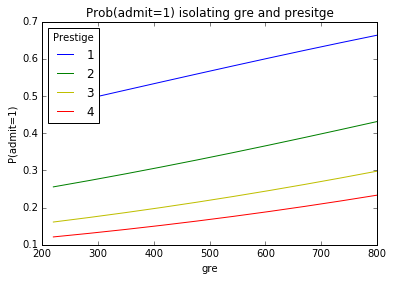

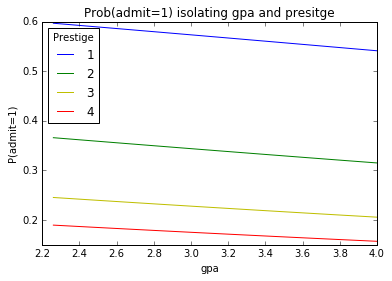

In [39]:
def isolate_and_plot(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                            aggfunc=np.mean)
    
    # in case you're curious as to what this looks like
    # print grouped.head()
    #                      admit_pred
    # gre        prestige            
    # 220.000000 1           0.282462
    #            2           0.169987
    #            3           0.096544
    #            4           0.079859
    # 284.444444 1           0.311718
    
    # make a plot
    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
                color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and presitge")
    pl.show()


isolate_and_plot('gre')
isolate_and_plot('gpa')



